# Naive Bayes Classification

### The purpose of this exercise is to build a classifer of gender, given data about actual and ideal weights. 

In [1]:
#%% import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

In [2]:
#%% read in data
df = pd.read_csv('/Users/amybrown/Thinkful/Unit_4/Lesson_3/curric-data-001-data-sets/ideal-weight/ideal_weight.csv')

In [4]:
#%% clean data
df.columns = [c_name.replace("'", '') for c_name in df.columns.values.tolist()] 
df['sex'] = df['sex'].str.replace("'", '') # remove quotes from values in sex column

### The plot below shows the distributions of actual and ideal weights. 

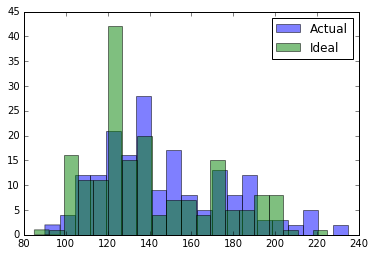

In [5]:
#%% plot actual v ideal weights
actual = df['actual']
ideal = df['ideal']

# may want to mess with binning, etc. 
plt.hist(actual, alpha=0.5, label='Actual', bins=20)
plt.hist(ideal,  alpha=0.5, label='Ideal', bins=20)
plt.legend(loc='upper right')
plt.show()

### This plot shows the difference in the difference between actual and ideal weights. 

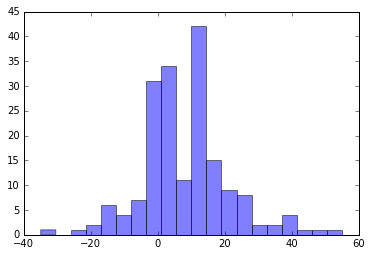

In [6]:
#%% plot diff var
diff = df['diff']
plt.hist(diff, alpha=0.5, bins=20)
plt.show()

In [7]:
#%% map sex to a categorical variable
df_dummy = pd.get_dummies(df['sex'])
df = pd.concat([df, df_dummy], axis=1) #note: only use either Female or Male in analysis

In [8]:
#%% are there more males or females in the dataset?
freq = print(Counter(df['sex']))
# there are 56 more females in the dataset than males

Counter({'Female': 119, 'Male': 63})


### There are 63 males in the dataset, and 56 more females than males. 

In [9]:
#%% split data into outcome and predictors
final_df = df[['actual', 'ideal', 'diff']]
class_df = df[['Male']] # remember during interpretation that this means Male = 1 and Female = 0

In [10]:
model = GaussianNB()
model.fit(final_df, class_df.values.ravel())
print(model)
expected = class_df.values.ravel()
predicted = model.predict(final_df)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94       119
        1.0       0.89      0.89      0.89        63

avg / total       0.92      0.92      0.92       182

[[112   7]
 [  7  56]]


In [11]:
#%% check fit
(expected==predicted).all() # checks whether the arrays are equivalent, which they are not
check = np.equal(expected, predicted)
mislabled = print(Counter(check)) # 14 points were mislabeled

Counter({True: 168, False: 14})


### The classifier mislabled 14 data points. 

In [14]:
#%% predict 
print(model.predict([[145, 160, -15]])) # what gender?

[ 1.]


### A datapoint with an actual weight of 145 and an ideal weight of 160 (with a difference of 15 lbs) is classified as male by the Naive Bayes model.

In [ ]:
print(model.predict([[160, 145, 15]])) # what gender?

### A datapoint with an actual weight of 160 and an ideal weight of 145 (with a difference of 15 lbs) is classified as female by the Naive Bayes model. 